In [3]:
# Importing basic libraries for data manipulation and visualization
import pandas as pd            # For working with dataframes
import numpy as np             # For numerical operations
import matplotlib.pyplot as plt  # For plotting charts
import seaborn as sns          # For advanced visualization
import warnings                # To ignore unnecessary warning messages
warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv("train.csv")  
print("Dataset Loaded Successfully!")

df.head()


Dataset Loaded Successfully!


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

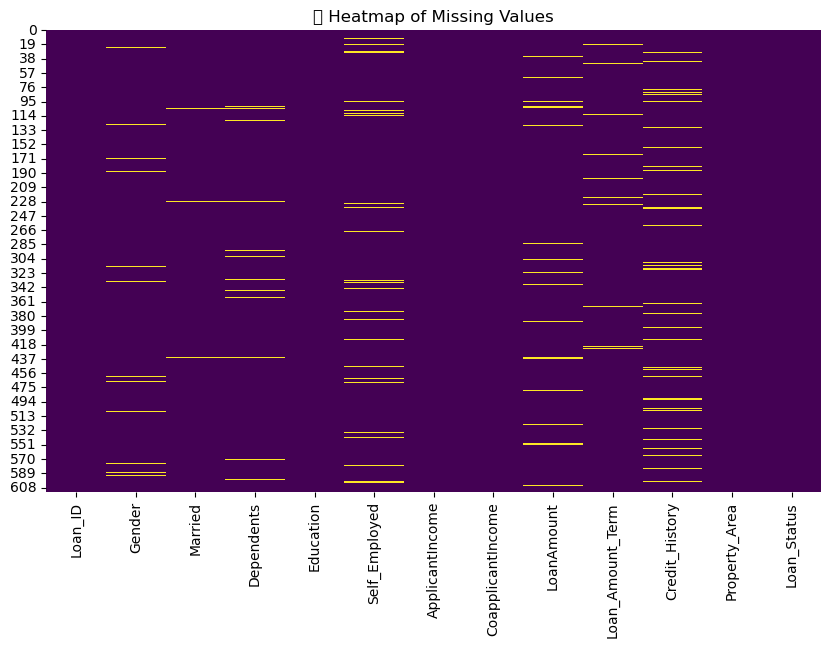

In [7]:
#Visualize missing values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("🟨 Heatmap of Missing Values")
plt.show()

In [8]:
# List of categorical columns with missing values
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

# Fill missing categorical values with mode (most frequent value)
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

# Fill missing value in numerical column 'LoanAmount' with its median (can also use mean)
median_loan = df['LoanAmount'].median()
df['LoanAmount'].fillna(median_loan, inplace=True)
print(f"\nFilled missing values in 'LoanAmount' with median: {median_loan}")

# Double check there are no more missing values
print("\n Missing Values After Imputation:")
print(df.isnull().sum())


Filled missing values in 'Gender' with mode: Male
Filled missing values in 'Married' with mode: Yes
Filled missing values in 'Dependents' with mode: 0
Filled missing values in 'Self_Employed' with mode: No
Filled missing values in 'Credit_History' with mode: 1.0
Filled missing values in 'Loan_Amount_Term' with mode: 360.0

Filled missing values in 'LoanAmount' with median: 128.0

 Missing Values After Imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
# Create LabelEncoder object
le = LabelEncoder()

# List of binary columns to encode
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

# Apply label encoding to each binary column
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded '{col}' with LabelEncoder.")


Encoded 'Gender' with LabelEncoder.
Encoded 'Married' with LabelEncoder.
Encoded 'Education' with LabelEncoder.
Encoded 'Self_Employed' with LabelEncoder.
Encoded 'Loan_Status' with LabelEncoder.


In [11]:
# One-Hot Encode non-binary categorical columns
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

print("One-Hot Encoding complete for 'Dependents' and 'Property_Area'")


One-Hot Encoding complete for 'Dependents' and 'Property_Area'


In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Numerical features scaled successfully.")


Numerical features scaled successfully.


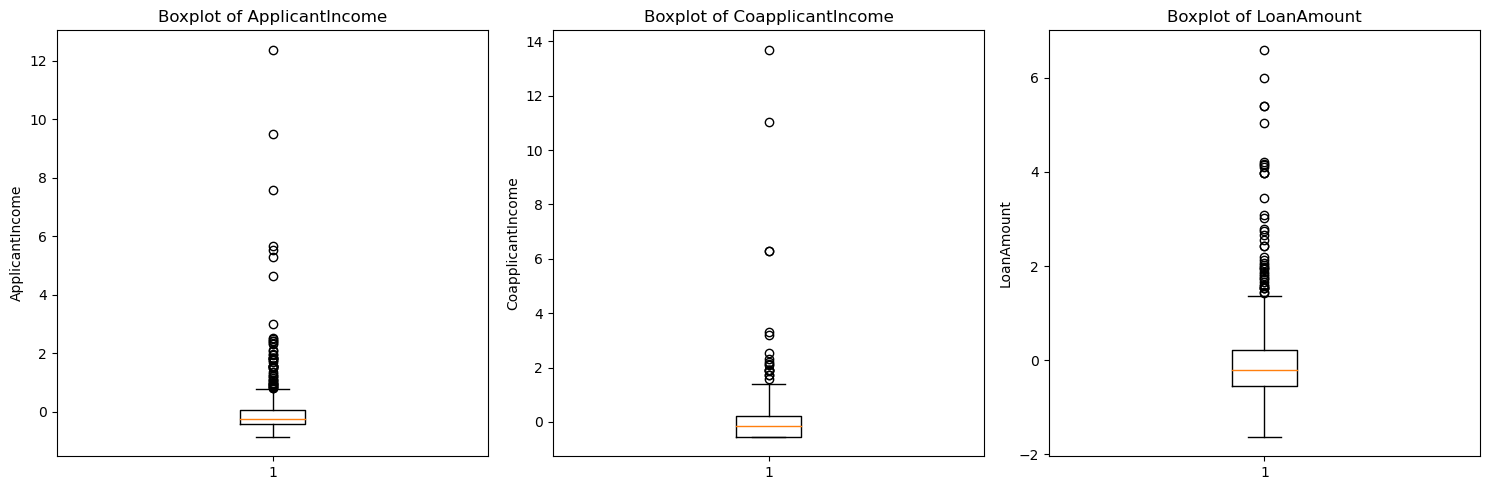

In [14]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot boxplots for each numeric column using matplotlib
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


 Remove Outliers using IQR Method.

In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [16]:
for col in num_cols:
    original_shape = df.shape
    df = remove_outliers_iqr(df, col)
    new_shape = df.shape
    print(f"Removed outliers from '{col}': {original_shape[0] - new_shape[0]} rows dropped.")

Removed outliers from 'ApplicantIncome': 50 rows dropped.
Removed outliers from 'CoapplicantIncome': 16 rows dropped.
Removed outliers from 'LoanAmount': 28 rows dropped.


In [23]:
# Save the cleaned and processed dataset to a new CSV file
df.to_csv('Cleaned_Loan_Data.csv', index=False)

In [18]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split into training and testing sets.")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Data split into training and testing sets.
Training shape: (416, 15)
Testing shape: (104, 15)
